In [3]:
import pandas as pd
print("--- Loading original dataset... ---")
df = pd.read_csv('rainfall in india 1901-2015.csv')
print(df.head())

--- Loading original dataset... ---
                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9  

In [4]:
print("--- Filtering for Kerala... ---")
kerala_df_raw = df[df['SUBDIVISION'] == 'KERALA'].copy()
print(kerala_df_raw.head())

--- Filtering for Kerala... ---
     SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG  \
3887      KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5   
3888      KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8   
3889      KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2   
3890      KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8   
3891      KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6   

        SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
3887  197.7  266.9  350.8   48.4  3248.6     73.4    386.2   2122.8    666.1  
3888  491.6  358.4  158.3  121.5  3326.6      9.3    275.7   2403.4    638.2  
3889  341.8  354.1  157.0   59.0  3271.2     21.7    336.3   2343.0    570.1  
3890  222.7  328.1   33.9    3.3  3129.7     26.7    339.4   2398.2    365.3  
3891  217.2  383.5   74.4    0.2  2741.6     23.4    378.5   1881.5    458.1  


In [5]:
print("--- Reshaping the data... ---")
months_to_keep = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

kerala_df = kerala_df_raw.melt(
    id_vars='YEAR',
    value_vars=months_to_keep,
    var_name='Month',
    value_name='Rainfall'
)

# --- Diagnostic Check ---
print("\n--- These are the ONLY unique values that should be in the 'Month' column: ---")
print(kerala_df['Month'].unique())

--- Reshaping the data... ---

--- These are the ONLY unique values that should be in the 'Month' column: ---
['JAN' 'FEB' 'MAR' 'APR' 'MAY' 'JUN' 'JUL' 'AUG' 'SEP' 'OCT' 'NOV' 'DEC']


In [6]:
print("--- Mapping months to numbers... ---")
month_map = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}
kerala_df['Month_Num'] = kerala_df['Month'].map(month_map)

# --- Diagnostic Check ---
print("\n--- Checking for missing values after mapping. Month_Num should have 0. ---")
print(kerala_df.isnull().sum())

--- Mapping months to numbers... ---

--- Checking for missing values after mapping. Month_Num should have 0. ---
YEAR         0
Month        0
Rainfall     0
Month_Num    0
dtype: int64


In [8]:
# --- Step 5: Final Check and Conversion ---

print("--- Running final pre-conversion diagnostics ---")

# Let's be absolutely sure about our data types before we create the date
# We will explicitly convert YEAR and Month_Num to integers.
kerala_df['YEAR'] = kerala_df['YEAR'].astype(int)
kerala_df['Month_Num'] = kerala_df['Month_Num'].astype(int)


# --- Diagnostic Check ---
print("\n--- Data types of the columns being used: ---")
print(kerala_df[['YEAR', 'Month_Num']].info())


print("\n--- Checking again for any nulls (should be 0): ---")
print(kerala_df[['YEAR', 'Month_Num']].isnull().sum())


# --- The Failing Line ---
print("\n--- Attempting to create the Date column... ---")
try:
    # Create a temporary dataframe to pass to the function
    date_components = kerala_df.assign(Day=1)[['YEAR', 'Month_Num', 'Day']]
    
    kerala_df['Date'] = pd.to_datetime(date_components)
    kerala_df = kerala_df.sort_values(by='Date')

    print("\n--- SUCCESS! It worked! Here is the final data: ---")
    print(kerala_df.head())

except Exception as e:
    print("\n--- ERROR! The error occurred again. ---")
    print(f"Error message: {e}")
    print("\n--- Here are the first 5 rows of the data that caused the error: ---")
    print(date_components.head())

--- Running final pre-conversion diagnostics ---

--- Data types of the columns being used: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   YEAR       1380 non-null   int64
 1   Month_Num  1380 non-null   int64
dtypes: int64(2)
memory usage: 21.7 KB
None

--- Checking again for any nulls (should be 0): ---
YEAR         0
Month_Num    0
dtype: int64

--- Attempting to create the Date column... ---

--- ERROR! The error occurred again. ---
Error message: to assemble mappings requires at least that [year, month, day] be specified: [month] is missing

--- Here are the first 5 rows of the data that caused the error: ---
   YEAR  Month_Num  Day
0  1901          1    1
1  1902          1    1
2  1903          1    1
3  1904          1    1
4  1905          1    1


In [9]:
from sklearn.model_selection import train_test_split

print("--- Engineering features... ---")

# We will use the past 3 months of rainfall to predict the next month.
for i in range(1, 4):
    kerala_df[f'Rainfall_Lag_{i}'] = kerala_df['Rainfall'].shift(i)

# Drop rows with NaN values (the first few rows with no lag data)
kerala_df.dropna(inplace=True)

# Define our features (X) and target (y)
features = ['Rainfall_Lag_1', 'Rainfall_Lag_2', 'Rainfall_Lag_3']
target = 'Rainfall'

X = kerala_df[features]
y = kerala_df[target]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print("--- Data is ready for the model! ---")

--- Engineering features... ---
Training set size: 1101 samples
Testing set size: 276 samples
--- Data is ready for the model! ---


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

print("--- Training the Random Forest model... ---")

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

print("--- Model training complete! ---")

--- Training the Random Forest model... ---
--- Model training complete! ---


In [11]:
print("--- Evaluating model performance... ---")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n--- Model Evaluation Results ---")
print(f"Mean Absolute Error (MAE): {mae:.2f} mm")
print(f"R-squared (R²) Score: {r2:.2f}")

print("\n*MAE tells us, on average, how far off our predictions are from the actual rainfall.")
print("*R² tells us how much of the variation in rainfall our model can explain (closer to 1.0 is better).")

--- Evaluating model performance... ---

--- Model Evaluation Results ---
Mean Absolute Error (MAE): 89.87 mm
R-squared (R²) Score: 0.70

*MAE tells us, on average, how far off our predictions are from the actual rainfall.
*R² tells us how much of the variation in rainfall our model can explain (closer to 1.0 is better).


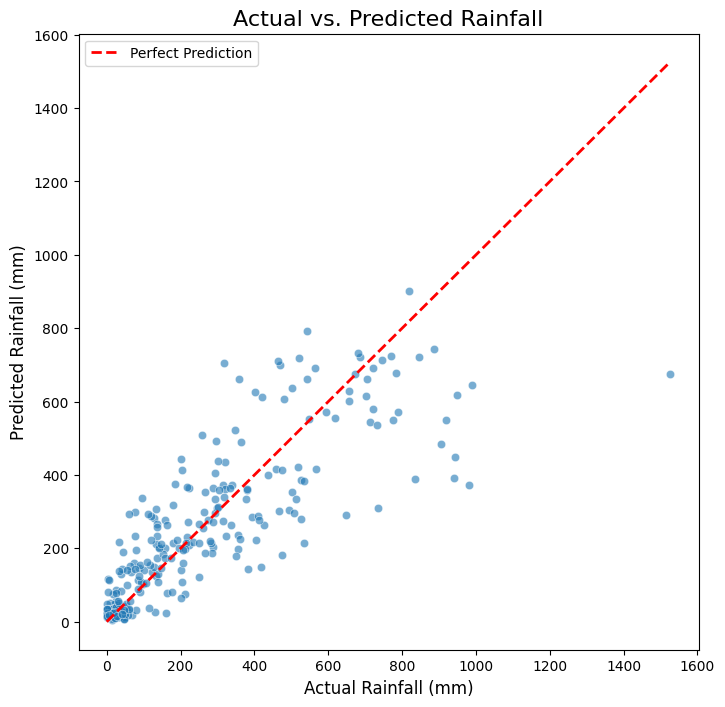

In [12]:
# --- Plot: Actual vs. Predicted Rainfall ---
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Add a line for perfect predictions (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Prediction')

plt.title('Actual vs. Predicted Rainfall', fontsize=16)
plt.xlabel('Actual Rainfall (mm)', fontsize=12)
plt.ylabel('Predicted Rainfall (mm)', fontsize=12)
plt.legend()
plt.show()